# Image annotations for a batch of patients

In this notebook, for a batch of patients we view and annotate MRI images by drawing polygons on the images.

<div class="alert alert-block alert-info">

<p>Machine learning engineers work <b>iteratively</b> with domain experts, such as <b>cardiologists</b>, to understand how well the model is performing, and to enumerate the situations in which it needs <b>improvement</b>.  In some cases cardiologists provide direct input to the model in the form of annotated images:
<blockquote><b>Deep learning enables genetic analysis of the human thoracic aorta</b><br>
James P. Pirruccello, et. al. bioRxiv 2020.05.12.091934; doi: <ahref="https://doi.org/10.1101/2020.05.12.091934">https://doi.org/10.1101/2020.05.12.091934</a></blockquote></p>

</div>

# Setup

<div class="alert alert-block alert-warning">
    This notebook assumes <b>Terra</b> is running custom Docker image <kbd>ghcr.io/broadinstitute/ml4h/ml4h_terra:20210902_181409</kbd>.
</div>

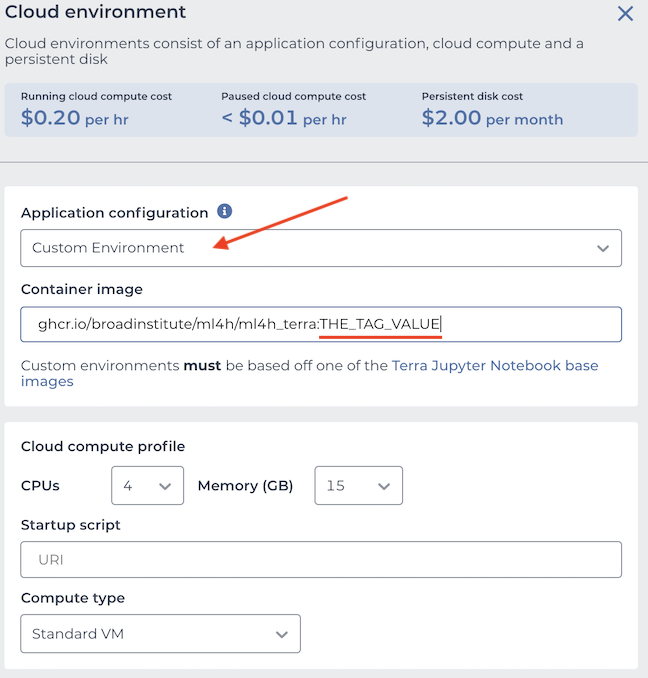

In [ ]:
from ml4h.visualization_tools.batch_image_annotations import BatchImageAnnotator
import pandas as pd
import tensorflow as tf

In [ ]:
%%javascript
// Display cell outputs to full height (no vertical scroll bar)
IPython.OutputArea.auto_scroll_threshold = 9999;

In [ ]:
pd.set_option('display.max_colwidth', -1)

# Annotate MRIs

<div class="alert alert-block alert-info">

<p>Using the widget below, <b>pretend to be a cardiologist</b> annotating images for a batch of patients.</p>

<p>Specifically, examine each <b>MRI</b> and draw a polygon around the left ventricle.</p>

</div>

## Define the batch of patients to annotate

In [ ]:
# In general, we would read in a CSV file but for this demo we define the batch right here.
patients_df = pd.DataFrame(
  columns=BatchImageAnnotator.EXPECTED_COLUMN_NAMES,
    data=[
        ['fake_1', 'cine_lax_3ch_192', 25,  'gs://fc-500bd872-4a53-45c9-87d3-39656bd83f85/data/fake_hd5s/'],
        ['fake_1', 'cine_lax_4ch_192', 25,  'gs://fc-500bd872-4a53-45c9-87d3-39656bd83f85/data/fake_hd5s/'],
        ['fake_2', 'cine_lax_3ch_192', 25,  'gs://fc-500bd872-4a53-45c9-87d3-39656bd83f85/data/fake_hd5s/'],
        ['fake_2', 'cine_lax_4ch_192', 25,  'gs://fc-500bd872-4a53-45c9-87d3-39656bd83f85/data/fake_hd5s/'],
    ])

patients_df.shape

In [ ]:
patients_df.head(n = 10)

## Annotate the batch! 

In [ ]:
annotator = BatchImageAnnotator(samples=patients_df,
                                zoom=2.0,
                                annotation_categories=['region_of_interest'])
annotator.annotate_images()

## View the stored annotations

You can see in the output below that the bounding box annotations (the polygons) are stored as a set of ordered tuples containing the coordinates of each point in the polygon. The coordinates are relative to the dimensions of the image, stored as a TensorMap.

For the purposes of this demo we are storing and displaying only those annotations created within this session. The ml4h toolkit includes functionaltiy to also persist these annotations to durable storage.

In [ ]:
annotator.view_recent_submissions(count=10)

# Provenance

In [ ]:
import datetime
print(datetime.datetime.now())

In [ ]:
%%bash
pip3 freeze

Questions about these particular notebooks? Join the discussion https://github.com/broadinstitute/ml4h/discussions.